<a href="https://colab.research.google.com/github/EvaFerawaty/Assignment_PYTN_081_EvaFerawaty/blob/master/PYTN_2_081_EVAFERAWATY_220722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT DATA VISUALIZATION BATCH 081-EVA FG**
# **DATA VISUALIZATION NST RISK 2012 - 2021**



In [2]:
#IMPORT LIBRARY YANG DIBUTUHKAN

import numpy as np
import pandas as pd
import math
import statistics
import seaborn as sns
import statistics as stats
import scipy.stats
from scipy.stats import uniform
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
%matplotlib inline

In [7]:
#IMPORT DATASHEET YANG DIBUTUHKAN

from google.colab import files
data = files.upload()

Saving DataNST.csv to DataNST.csv


In [8]:
import io

In [9]:
df = pd.read_csv('DataNST.csv')
print ('data read into a pandas dataframe')

data read into a pandas dataframe


In [10]:
#MELIHAT 5 DATA TERATAS

df.head(5)

,Year,Region,NST Type,NST Priority,NST Description,Booking Contract,Booking NTF Amount
0,2012,Region (06) - Jabarteng,Risk,Others,NST EXPOSURE,3,286956000.0
1,2012,Region (07) - JATIMBALI,Risk,Others,Minimum DP,1,35927000.0
2,2012,Region (08) - SULAMPA,Risk,Others,NST EXPOSURE,1,134608000.0
3,2012,Region (09) - KALIMANTAN,Risk,No Price List,tidak sama dengan Price List,1,227500000.0
4,2012,Region (06) - Jabarteng,Risk,Others,NST EXPOSURE,1,125801000.0


In [11]:
#MELIHAT 5 DATA TERBAWAH

df.tail(5)

,Year,Region,NST Type,NST Priority,NST Description,Booking Contract,Booking NTF Amount
5303,2021,Region (09) - KALIMANTAN,Risk,DSR/DIR/DSC,DSR Komersial Atau DSR Total tidak sesuai kete...,1,1.436500e+08
5304,2021,Region (09) - KALIMANTAN,Risk,LTV,Maximum LTV Allowed,21,5.368654e+09
5305,2021,Region (09) - KALIMANTAN,Risk,Others,EXPOSURE,3,3.350450e+08
5306,2021,Region (09) - KALIMANTAN,Risk,No Price List,tidak sama dengan Price List,6,2.233271e+09
5307,2021,Region (09) - KALIMANTAN,Risk,Others,Pefindo 31-90 hari dengan amount past due > 5 jt,2,9.520000e+07


In [12]:
#MELIHAT JUMLAH BARIS DAN KOLOM

df.shape 

(5308, 7)

In [13]:
#TAKE OUT DATA KOLOM DATA YANG TIDAK DIPERLUKAN

df1 = df.drop(['NST Type','NST Priority'], axis = 1)
df1.head(5)

,Year,Region,NST Description,Booking Contract,Booking NTF Amount
0,2012,Region (06) - Jabarteng,NST EXPOSURE,3,286956000.0
1,2012,Region (07) - JATIMBALI,Minimum DP,1,35927000.0
2,2012,Region (08) - SULAMPA,NST EXPOSURE,1,134608000.0
3,2012,Region (09) - KALIMANTAN,tidak sama dengan Price List,1,227500000.0
4,2012,Region (06) - Jabarteng,NST EXPOSURE,1,125801000.0


In [14]:
df1.shape

(5308, 5)

In [15]:
#MELIHAT DATA YG NULL

df1.isnull().sum()

Year                  0
Region                0
NST Description       0
Booking Contract      0
Booking NTF Amount    0
dtype: int64

In [16]:
#REPLACE NAMA REGION AGAR LEBIH SINGKAT

df1['REGION'] = df1['Region'].replace({'Region (06) - Jabarteng':'JABARTENG', 'Region (07) - JATIMBALI':'JATIMBALI', 'Region (08) - SULAMPA':'SULAMPA', 'Region (09) - KALIMANTAN':'KALIMANTAN', 'Region (05) - Jabodetabek':'JABODETABEK'})
df1.head(5)

,Year,Region,NST Description,Booking Contract,Booking NTF Amount,REGION
0,2012,Region (06) - Jabarteng,NST EXPOSURE,3,286956000.0,JABARTENG
1,2012,Region (07) - JATIMBALI,Minimum DP,1,35927000.0,JATIMBALI
2,2012,Region (08) - SULAMPA,NST EXPOSURE,1,134608000.0,SULAMPA
3,2012,Region (09) - KALIMANTAN,tidak sama dengan Price List,1,227500000.0,KALIMANTAN
4,2012,Region (06) - Jabarteng,NST EXPOSURE,1,125801000.0,JABARTENG


In [17]:
#TAKE OUT KOLOM REGION LAMA

df1.drop(['Region'], axis =1, inplace=True)
df1.head(5)

,Year,NST Description,Booking Contract,Booking NTF Amount,REGION
0,2012,NST EXPOSURE,3,286956000.0,JABARTENG
1,2012,Minimum DP,1,35927000.0,JATIMBALI
2,2012,NST EXPOSURE,1,134608000.0,SULAMPA
3,2012,tidak sama dengan Price List,1,227500000.0,KALIMANTAN
4,2012,NST EXPOSURE,1,125801000.0,JABARTENG


In [18]:
#MELIHAT TYPE DARI KOLOM

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308 entries, 0 to 5307
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5308 non-null   int64  
 1   NST Description     5308 non-null   object 
 2   Booking Contract    5308 non-null   int64  
 3   Booking NTF Amount  5308 non-null   float64
 4   REGION              5308 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 207.5+ KB


In [19]:
#MELIHAT DATA KOLOM "NST Description"

df1['NST Description']

0                                            NST EXPOSURE
1                                              Minimum DP
2                                            NST EXPOSURE
3                            tidak sama dengan Price List
4                                            NST EXPOSURE
                              ...                        
5303    DSR Komersial Atau DSR Total tidak sesuai kete...
5304                                  Maximum LTV Allowed
5305                                             EXPOSURE
5306                         tidak sama dengan Price List
5307     Pefindo 31-90 hari dengan amount past due > 5 jt
Name: NST Description, Length: 5308, dtype: object

In [21]:
#CHECK DUPLICATED DATA DARI KOLOM "NST Description"

print(sum(df1.duplicated()))
df1[df1.duplicated(keep=False)].sort_values(['NST Description']).head(5)

6


,Year,NST Description,Booking Contract,Booking NTF Amount,REGION
3435,2021,Credit Scoring,1,60000000.0,JABODETABEK
4384,2021,Credit Scoring,1,60000000.0,JABODETABEK
4609,2021,EXPOSURE,1,324637500.0,SULAMPA
4792,2021,EXPOSURE,1,501911000.0,KALIMANTAN
4806,2021,EXPOSURE,1,501911000.0,KALIMANTAN


In [22]:
#MENJUMLAHKAN DATA DARI KOLOM "NST Description"

df1['NST Description'].value_counts()
df1.head()

,Year,NST Description,Booking Contract,Booking NTF Amount,REGION
0,2012,NST EXPOSURE,3,286956000.0,JABARTENG
1,2012,Minimum DP,1,35927000.0,JATIMBALI
2,2012,NST EXPOSURE,1,134608000.0,SULAMPA
3,2012,tidak sama dengan Price List,1,227500000.0,KALIMANTAN
4,2012,NST EXPOSURE,1,125801000.0,JABARTENG


In [26]:
#UBAH TAHUN DARI BARIS MENJADI KOLOM

df1_pivot = df1.pivot_table('Booking Contract',index='NST Description',columns='Year',aggfunc={'Booking Contract':'sum'})
df1_pivot.head()

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
NST Description,,,,,,,,,,
Aplikasi kategori Corporate,NaN,NaN,NaN,NaN,NaN,NaN,5.0,31.0,23.0,44.0
Appeal Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Appeal Head Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
Bukti Kepemilikan Rumah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,9.0
Credit Scoring,NaN,NaN,NaN,NaN,NaN,NaN,9.0,26.0,486.0,394.0


In [28]:
#UBAH "NaN" MENJADI "0"

df1_pivot=df1_pivot.fillna(0)

In [30]:
#JUMLAHKAN NST DISETIAP TAHUN
df1_pivot['Total'] = df1_pivot.sum(axis=1)

In [31]:
#SORTING JUMLAH NST SECARA DESCENDING

df1_pivot.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [33]:
#LIHAT TOP 5 NST

df1_pivot_top5 = df1_pivot.head(5)
df1_pivot_top5

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
NST Description,,,,,,,,,,,
EXPOSURE,23.0,117.0,188.0,212.0,210.0,288.0,556.0,1374.0,504.0,863.0,4335.0
tidak sama dengan Price List,25.0,36.0,49.0,100.0,75.0,113.0,225.0,793.0,561.0,1562.0,3539.0
Maximum LTV Allowed,2.0,1.0,4.0,20.0,55.0,103.0,333.0,970.0,548.0,1471.0,3507.0
DSR Komersial Atau DSR Total tidak sesuai ketentuan,0.0,0.0,0.0,2.0,8.0,13.0,26.0,55.0,243.0,592.0,939.0
Credit Scoring,0.0,0.0,0.0,0.0,0.0,0.0,9.0,26.0,486.0,394.0,915.0


In [35]:
#TRANSPOSE DATA FRAME

df1_pivot_top5t = df1_pivot_top5.T
df1_pivot_top5t

NST Description,EXPOSURE,tidak sama dengan Price List,Maximum LTV Allowed,DSR Komersial Atau DSR Total tidak sesuai ketentuan,Credit Scoring
Year,,,,,
2012,23.0,25.0,2.0,0.0,0.0
2013,117.0,36.0,1.0,0.0,0.0
2014,188.0,49.0,4.0,0.0,0.0
2015,212.0,100.0,20.0,2.0,0.0
2016,210.0,75.0,55.0,8.0,0.0
2017,288.0,113.0,103.0,13.0,0.0
2018,556.0,225.0,333.0,26.0,9.0
2019,1374.0,793.0,970.0,55.0,26.0
2020,504.0,561.0,548.0,243.0,486.0


In [36]:
#DROP TOTAL

df2 = df1_pivot_top5t.drop('Total')
df2

NST Description,EXPOSURE,tidak sama dengan Price List,Maximum LTV Allowed,DSR Komersial Atau DSR Total tidak sesuai ketentuan,Credit Scoring
Year,,,,,
2012,23.0,25.0,2.0,0.0,0.0
2013,117.0,36.0,1.0,0.0,0.0
2014,188.0,49.0,4.0,0.0,0.0
2015,212.0,100.0,20.0,2.0,0.0
2016,210.0,75.0,55.0,8.0,0.0
2017,288.0,113.0,103.0,13.0,0.0
2018,556.0,225.0,333.0,26.0,9.0
2019,1374.0,793.0,970.0,55.0,26.0
2020,504.0,561.0,548.0,243.0,486.0


# **MELIHAT NST DESC MANA YANG PALING BANYAK BOOKING NST**

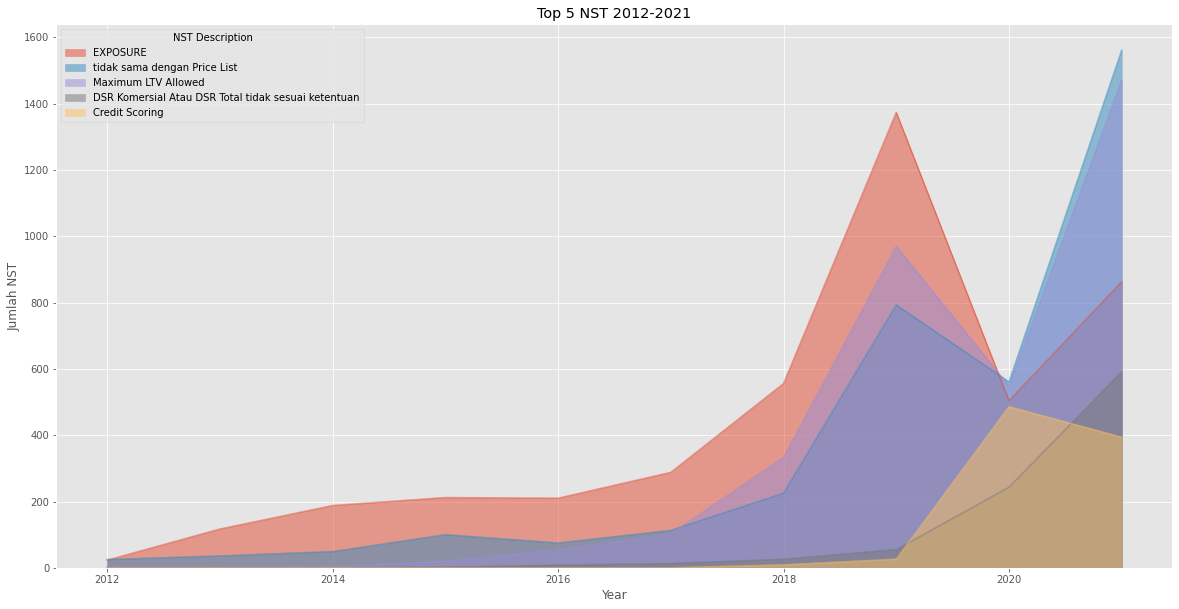

In [40]:
#BUAT VISUALISASI DARI DATA TOP 5 NST


df2.plot(kind='area',
stacked=False,
figsize=(20,10),
alpha=0.50,
   )
plt.title('Top 5 NST 2012-2021')
plt.ylabel('Jumlah NST')
plt.xlabel('Year')

plt.show()

**1.Apakah ada perbedaan jumlah antara NST di tahun 2012-2021?**
ya ada, terdapat kecendrungan peningkatan NST Risk pada jangka waktu 10 tahun.
dari tahun 2012 s.d 2016 Visualisasi peningkatan NST masih dapat dikatakan tidak signifikan, tetapi mulai dari 2017 visualisasi peningkatan melesat jauh di hampir 5 top NST tsb.

**2.Apakah ada perbedaan jumlah NST tergantung dari kategori NST tersebut?**
ya ada, tervisualisasi pada plot diatas

**3.Apakah ada trend tertentu di NST? Ada yang lebih banyak? Ada yang naik/ turun/ stagnan?**
ya,trend booking contract yang NST mengalami peningkatan tiap tahunnya dalam 10 tahun.
tetapi di tahun 2020 semua NST mengalami penurunan dikarenakan kondisi stop booking dampak dari COVID-19
dan kembali terjadi peningkatan di tahun 2021 khususnya pada NST : **tidak sama dengan PL dan maksimal LTV allowed.**

# **MELIHAT REGION MANA YANG PALING BANYAK BOOKING NST**

In [38]:
df1.head()

,Year,NST Description,Booking Contract,Booking NTF Amount,REGION
0,2012,NST EXPOSURE,3,286956000.0,JABARTENG
1,2012,Minimum DP,1,35927000.0,JATIMBALI
2,2012,NST EXPOSURE,1,134608000.0,SULAMPA
3,2012,tidak sama dengan Price List,1,227500000.0,KALIMANTAN
4,2012,NST EXPOSURE,1,125801000.0,JABARTENG


In [44]:
dataReg = df1[(df1['Year']>2011)].groupby(['Year','REGION']).agg({'Booking Contract': 'sum'})
dataReg.head()

Booking Contract
Year REGION                       
2012 JABARTENG                  17
     JABODETABEK                 4
     JATIMBALI                   9
     KALIMANTAN                 26
     SULAMPA                    50

In [47]:
dataReg = dataReg.reset_index()[['REGION', 'Booking Contract']].groupby(['REGION']).agg({'Booking Contract': 'sum'})
dataReg.head()

,Booking Contract
REGION,
JABARTENG,3232
JABODETABEK,4209
JATIMBALI,2686
KALIMANTAN,3516
SULAMPA,3955


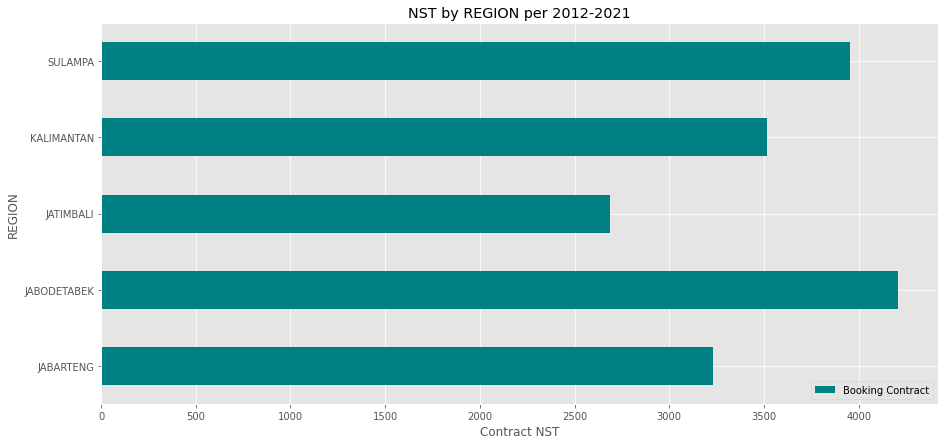

In [94]:
dataReg.plot(kind = 'barh', figsize=(15,7), color='teal')
plt.title('NST by REGION per 2012-2021')
plt.xlabel('Contract NST')
plt.ylabel('REGION')
plt.show()

**REGION JABODETABEK YANG MENJADI REGION TERATAS MEMPUNYAI BOOKING NST : 4209ctr**


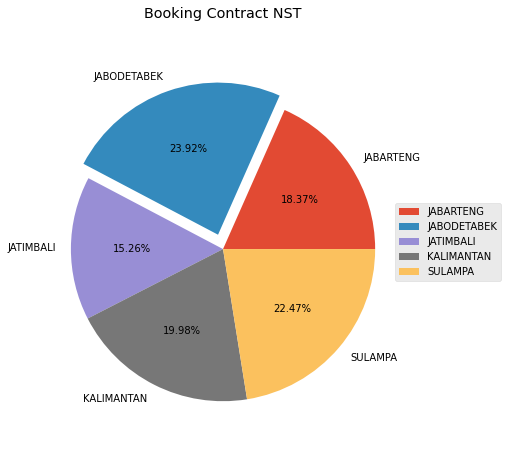

In [103]:
dataNST = df1.groupby(['REGION'])['Booking Contract'].sum()
dataNST.plot(kind="pie", autopct="%.2f%%", explode=[0,0.1,0,0,0] ,legend=True, ylabel="", rot=4, figsize=(6,8))
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Booking Contract NST')
plt.axis('equal') 
plt.show()

**REGION JABODETABEK YANG MENJADI REGION TERATAS MEMPUNYAI BOOKING NST : 23.92%**


**### ANALYSIS CONFIDENCE INTERVAL (ANALISA INTERVAL KEPERCAYAAN)**

In [66]:
NST_A = df1[['REGION','Booking Contract']]
print(NST_A.shape)
NST_A.head()

(5308, 2)


,REGION,Booking Contract
0,JABARTENG,3
1,JATIMBALI,1
2,SULAMPA,1
3,KALIMANTAN,1
4,JABARTENG,1


In [67]:
NST_A.groupby('REGION').agg({'Booking Contract': [np.mean, np.std, np.size]})

Booking Contract                
                        mean       std  size
REGION                                      
JABARTENG           3.177974  4.005015  1017
JABODETABEK         3.554899  4.354769  1184
JATIMBALI           2.925926  3.580354   918
KALIMANTAN          3.323251  3.913861  1058
SULAMPA             3.496905  4.582840  1131

In [70]:
mean_JBDTK = 3.5548986486486487 #mean harga jual di Manhattan
sd_JBDTK = 4.354769403512261 #standard deviation harga jual di Manhattan
n_JBDTK = 1184 #total jumlah penjualan rumah di Manhattan
z_JBDTK = 1.96 #skor z

In [72]:
se_JBDTK = sd_JBDTK / np.sqrt(n_JBDTK)
se_JBDTK

0.1265579151080327

In [73]:
lcb = mean_JBDTK - z_JBDTK* se_JBDTK
ucb = mean_JBDTK + z_JBDTK* se_JBDTK
lcb, ucb

(3.306845135036905, 3.8029521622603926)

95% keyakinan bahwa jumlah booking contract di Jabodetabek adalah : 3

In [74]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
JABARTENG = df1[df1['REGION'] == 'JABARTENG']
JABODETABEK = df1[df1['REGION'] == 'JABODETABEK']

n_JBTG = len(JABARTENG)
mean_JBTG = JABARTENG['Booking Contract'].mean()
std_JBTG = JABARTENG['Booking Contract'].std()

n_JBDTK = len(JABODETABEK)
mean_JBDTK = JABODETABEK['Booking Contract'].mean()
std_JBDTK = JABODETABEK['Booking Contract'].std()

print(n_JBTG, mean_JBTG, std_JBTG)
print(n_JBDTK, mean_JBDTK, std_JBDTK)

1017 3.1779744346116026 4.005014896132523
1184 3.5548986486486487 4.354769403512264


In [76]:
print(('zstat', 'p-value'))
sm.stats.ztest(JABARTENG['Booking Contract'], JABODETABEK['Booking Contract'], alternative = 'two-sided')

('zstat', 'p-value')


(-2.1006919946565237, 0.03566801251213715)

p value < alpha
0.03 < 0.05
#hipotesis nol dapat ditolak

# Kesimpulan : booking contract NST Risk antara JABARTENG dan JABODETABEK berbeda.